### Mount your Google Drive into this instance of Colab
If you have not already done so, install Google Drive for Desktop on your machine and create a folder in your Google Drive called "Github". Then run the cell below. Then use GitHub Desktop or other approach to clone the class repository into that folder.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/GitHub


/content/drive/MyDrive/GitHub


### After mounting Google Drive (and cloning the repository if needed), cd to your Github folder on Google Drive

In [3]:
%cd 'soil-physics-theory'


/content/drive/MyDrive/GitHub/soil-physics-theory


In [4]:
%cd 'content/chapter-4'

/content/drive/MyDrive/GitHub/soil-physics-theory/content/chapter-4


### Install required modules

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PSP_heat import *
from PSP_thermalCond import *
from PSP_soil import *
from math import *

### 4.1 At what temperature is the thermal conductivity of wet soil independent of water content?

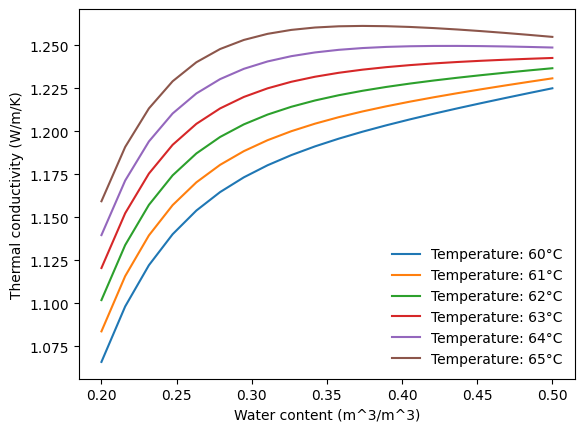

In [ ]:
# Define parameters
bulkDensity = 1100  # kg/m^3
clay = 0.250  # clay content of soil (g/g)
waterContents = np.linspace(0.2, 0.5, 20)  # Vary water content from 30% to 50%
temperatures = range(60, 66, 1)  # Temperature range from 63°C to 66°C

# Calculate thermal conductivity for each temperature and water content
thermal_conductivities = []
for temp in temperatures:
    conductivity_at_temp = []
    for water_content in waterContents:
        conductivity_at_temp.append(thermalConductivity(bulkDensity, water_content, clay, temp))
    thermal_conductivities.append(conductivity_at_temp)

# Plotting
for i, temp in enumerate(temperatures):
    plt.plot(waterContents, thermal_conductivities[i], label=f'Temperature: {temp}°C')

plt.xlabel('Water content (m^3/m^3)')
plt.ylabel('Thermal conductivity (W/m/K)')
plt.legend(fontsize='8')
plt.legend(frameon=False)
plt.grid(False)
plt.show()

At 64$^{\circ}$C, the thermal conductivity of a soil with a bulk density of 1100 kg m$^{-3}$ and clay content of 25% is approximately independent of soil water contents between 0.35 and 0.50 m$^3$ m$^{-3}$. This occurs because at this temperature the thermal conductivity of the gas phase is approximately equal to that of the liquid phase.

Original answer with erroneous code:
I believe this is caused by the laws used in the justification of the 1994 Campbell model. This model is based on the idea that the thermal conductivity of the soil is a weighted average of its constiiuent parts. So when the soil gets to roughly 70 &deg;C the conductivity of the soil gas, which is temperature dependent, becomes equivelent to or greater than the thermal conductivity of the soil water.

### 4.2 What is the possible range of volumetric specific heat in mineral soils?

The minimum value will occur when bulk density and soil water content are at their minimum values, which for mineral soils could be a bulk density of 950 kg m$^{-3}$ and soil water content of 0.00 m$^3$ m$^{-3}$.

In [ ]:
bulkDensity = 950 # kg m^-3
waterContent = 0.00 # m^3 m^-3
C_h = heatCapacity(bulkDensity, waterContent)
print("The minimum heat capacity is approximately " + f'{C_h/10**6:.3f}' + " MJ/m^3/K.")

The minimum heat capacity is approximately 0.860 MJ/m^3/K.


The maximum value will occur when bulk density is minimum and soil water content is maximum, which for mineral soils could be a bulk density of 950 kg m$^{-3}$ and soil water content equal to the porosity.

In [ ]:
bulkDensity = 950 # kg m^-3
porosity = 1 - bulkDensity/2650 # m^3 m^-3
waterContent = porosity # m^3 m^-3
C_h = heatCapacity(bulkDensity, waterContent)
print("The maximum heat capacity is approximately " + f'{C_h/10**6:.3f}' + " MJ/m^3/K.")

The maximum heat capacity is approximately 3.542 MJ/m^3/K.


### Problem 3

a) **what effect would surface mulch have on soil temp?**

b) **At what depth is the soil 180° out of phase with the surface of the soil**

Soil temperatures for a bare soil surface without surface residue mulch. Calculations were performed using the finite difference solver with a soil water content of 0.35, a mean temperature of 25$^o$C, an amplitude of 10$^o$C at the soil surface, and a weighting factor of 0.6 for time discretization, simulating for 72 hours.

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?1
water content (m^3/m^3): .35
mean temperature [C]: 25
amplitude of change in temperature [C]: 10
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = .6
nr of simulation hours: 72
nr of iterations per hour: 1.0416666666666667


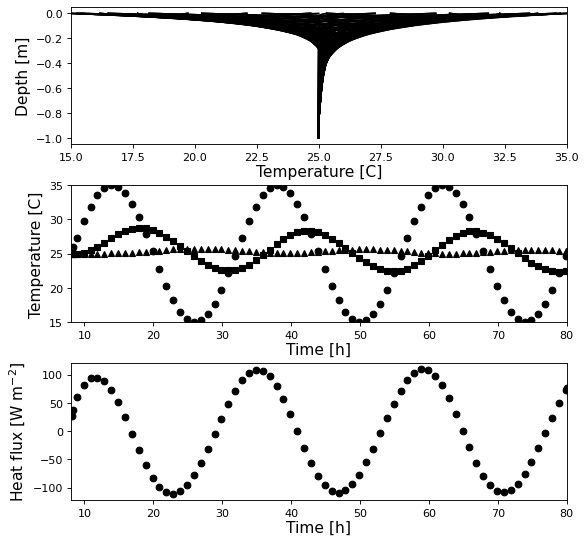

<Figure size 640x480 with 0 Axes>

In [ ]:
run main2.py


###a)

a mulch applied to the surface would decrease the amplitude of the temperature change and the heat flux throughout the soil depths.

###b)

as the figure above shows the 30 cm depth exhibited the best example of an opposing sine wave. Thus at the 30 cm depth we are 180° out of phase with the surface layer

##Problem 4

**Modify the program PSP_heat.py so that it allows water content to change with
depth. Then compare simulations for uniform, dry soil with simulations of a moist
soil with a dry dust mulch on the surface.**

1 Finite Difference
2 Cell-Centered Finite Volume
Select solver: 1
Uniform water content (1) or variable water content with depth (2)?2
surface water content (m^3/m^3): 0.05
sub-surface water content (m^3/m^3): 0.20
[0.05 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2 ]
22
mean temperature [C]: 15
amplitude of change in temperature [C]: 5
weighting factor for time discretization: (0: explicit, 1: implicit Euler) = 0.6
nr of simulation hours: 48
nr of iterations per hour: 1.0625


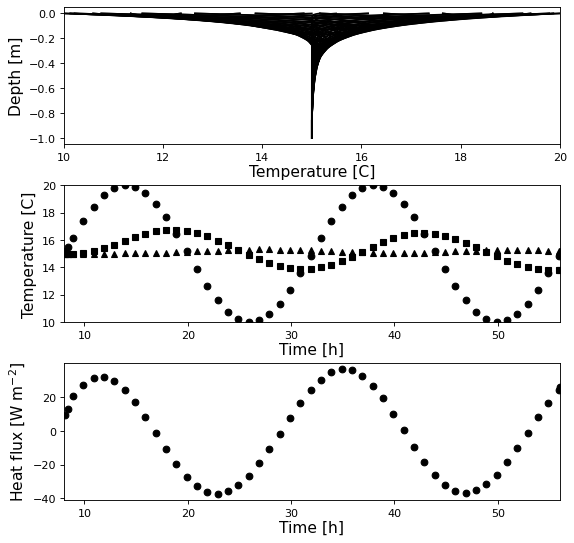

<Figure size 640x480 with 0 Axes>

In [ ]:
run main2.py

##Problem 5

modify main to print the 22 temps of 15 and 30 cm depths

##Problem 6

**modify clay and bulk of soil.py and investigate the effect of these variables on soil temp at 3 textures and 2 densities**

In [ ]:
Db= [1500,900]
clay= [0.1,0.3,0.7]
theta = 0.3
temp = 25

for i in Db:
    for j in clay:
        K = thermalConductivity(i, theta, j, temp)
        print('bulk density = ', i, ' clay = ', j, ' conductivity = ', K)


bulk density =  1500  clay =  0.1  conductivity =  1.1905622999739145
bulk density =  1500  clay =  0.3  conductivity =  1.1862159732171547
bulk density =  1500  clay =  0.7  conductivity =  1.1213825252006733
bulk density =  900  clay =  0.1  conductivity =  0.6278320949527835
bulk density =  900  clay =  0.3  conductivity =  0.621795424005874
bulk density =  900  clay =  0.7  conductivity =  0.5352751195379998


As clay content increased the thermal conductivity decreased. In the higher clay soils this means the temperature would have changed more easily, requireing less energy to do so.

In the compacted soil the conductivity was almost double that of the freshly tilled soil, likely due to the increased porosity and thus air volume. When theta is increased there is much less difference between the two for that reason.

##Problem 7

**modify PSP Heat investigate the effects of the 3 types of solutions**
